In [14]:
from predict import predict
from helpers import draw_bboxs, resizer
import numpy as np

In [15]:
import PIL
from PIL import Image

In [16]:
weights = 'best.pt'
image_path = 'pic.jpg'
bboxs_image_save_path = 'pic_bboxs.jpg'
size = 1280

In [17]:
image = Image.open(image_path)

In [18]:
pred_list, pred = predict(
    weights=weights,
    source=image_path,
    imgsz=[1344, 768]
)

In [19]:
image = draw_bboxs(image, pred_list)

In [20]:
image.save(bboxs_image_save_path, optimize=True, quality=100)

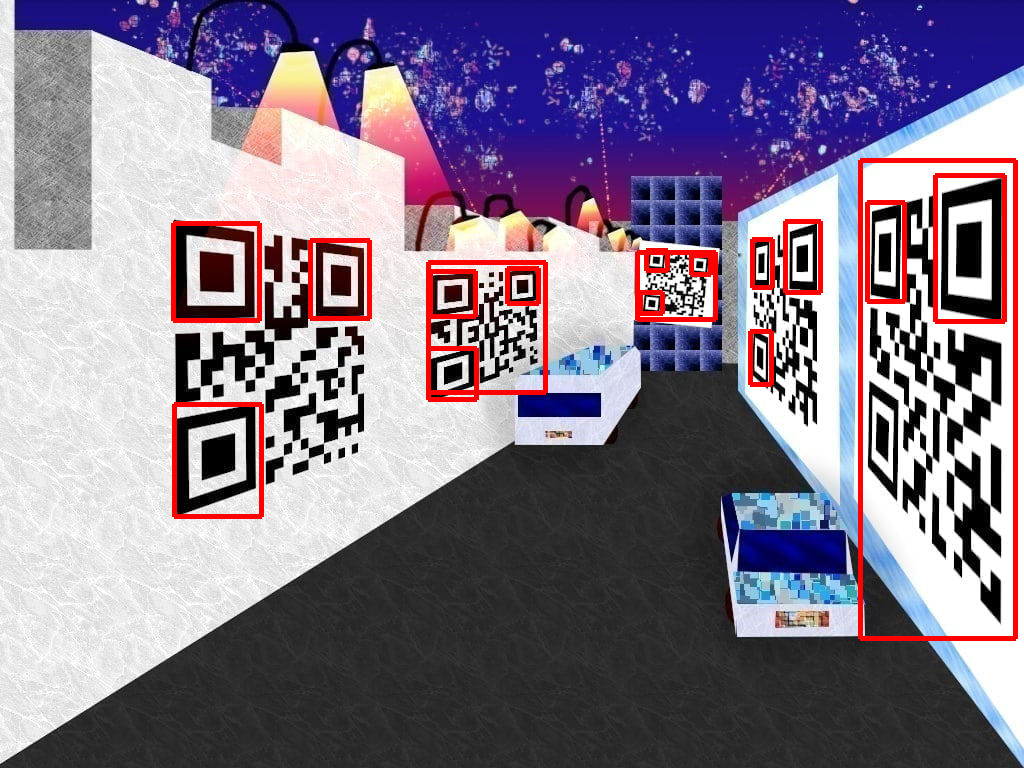

In [21]:
image

In [22]:
pred_list

[[750, 331, 771, 384],
 [860, 160, 1015, 638],
 [867, 202, 904, 301],
 [785, 221, 820, 292],
 [428, 262, 545, 392],
 [646, 250, 667, 270],
 [935, 175, 1004, 321],
 [691, 255, 710, 274],
 [752, 239, 772, 287],
 [507, 268, 538, 303],
 [430, 271, 475, 316],
 [428, 348, 476, 399],
 [640, 292, 662, 313],
 [310, 240, 369, 318],
 [174, 404, 261, 516],
 [173, 223, 259, 320],
 [637, 252, 715, 319]]

In [23]:
classes = np.array(pred[0])[:, -1]
for i in range(len(pred_list)):
    pred_list[i].append(classes[i])

In [24]:
pred_list

[[750, 331, 771, 384, 1.0],
 [860, 160, 1015, 638, 0.0],
 [867, 202, 904, 301, 0.0],
 [785, 221, 820, 292, 0.0],
 [428, 262, 545, 392, 0.0],
 [646, 250, 667, 270, 0.0],
 [935, 175, 1004, 321, 0.0],
 [691, 255, 710, 274, 0.0],
 [752, 239, 772, 287, 0.0],
 [507, 268, 538, 303, 0.0],
 [430, 271, 475, 316, 0.0],
 [428, 348, 476, 399, 0.0],
 [640, 292, 662, 313, 1.0],
 [310, 240, 369, 318, 0.0],
 [174, 404, 261, 516, 0.0],
 [173, 223, 259, 320, 1.0],
 [637, 252, 715, 319, 0.0]]

In [25]:
groups = {}
big_quads = [[256, 125, 375, 256, 1.0]]
small_quads = [[317, 120, 354, 155, 0.0],
[237, 143, 274, 178, 0.0],
[261, 224, 299, 263, 0.0]]
for q in small_quads:
    for i in range(len(big_quads)):
        b = big_quads[i]
        print(str(b[0])+" <= ("+str(q[0])+" + "+str(q[2])+") / 2 <= "+str(b[2])+"  "+str((q[0]+q[2])/2))
        print(str(b[1])+" <= ("+str(q[1])+" + "+str(q[3])+") / 2 <= "+str(b[3])+"  "+str((q[1]+q[3])/2))
        if b[0]-1 <= (q[0] + q[2]) / 2 <= b[2] and b[1] <= (q[1] + q[3]) / 2 <= b[3]:
            if not i in groups:
                groups[i] = []
            groups[i].append(q)
print(groups)

256 <= (317 + 354) / 2 <= 375  335.5
125 <= (120 + 155) / 2 <= 256  137.5
256 <= (237 + 274) / 2 <= 375  255.5
125 <= (143 + 178) / 2 <= 256  160.5
256 <= (261 + 299) / 2 <= 375  280.0
125 <= (224 + 263) / 2 <= 256  243.5
{0: [[317, 120, 354, 155, 0.0], [237, 143, 274, 178, 0.0], [261, 224, 299, 263, 0.0]]}


In [26]:
from predict import predict
from helpers import draw_bboxs, resizer

def get_quads(image, weights = "best.pt"):
    image_path = image
    
    pred_list, pred = predict(
    weights=weights,
    source=image_path,
    imgsz=[1344, 768])
    
    classes = np.array(pred[0])[:, -1]
    
    big_quads = []
    small_quads = []
    for i in range(len(pred_list)):
        pred_list[i].append(classes[i])
        if int(classes[i]) == 1:
            big_quads.append(pred_list[i])
        else:
            small_quads.append(pred_list[i])
            
    return big_quads, small_quads
        

big_quads, small_quads = get_quads('pic.jpg')

In [27]:
print(big_quads)
print(small_quads)

[[750, 331, 771, 384, 1.0], [640, 292, 662, 313, 1.0], [173, 223, 259, 320, 1.0]]
[[860, 160, 1015, 638, 0.0], [867, 202, 904, 301, 0.0], [785, 221, 820, 292, 0.0], [428, 262, 545, 392, 0.0], [646, 250, 667, 270, 0.0], [935, 175, 1004, 321, 0.0], [691, 255, 710, 274, 0.0], [752, 239, 772, 287, 0.0], [507, 268, 538, 303, 0.0], [430, 271, 475, 316, 0.0], [428, 348, 476, 399, 0.0], [310, 240, 369, 318, 0.0], [174, 404, 261, 516, 0.0], [637, 252, 715, 319, 0.0]]
